In [ ]:
!pip install qiskit ipywidgets

     |████████████████████████████████| 6.0MB 7.6MB/s 
     |████████████████████████████████| 18.0MB 216kB/s 
     |████████████████████████████████| 235kB 64.0MB/s 
     |████████████████████████████████| 215kB 68.7MB/s 
     |████████████████████████████████| 2.1MB 37.7MB/s 
     |████████████████████████████████| 1.0MB 32.9MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 194kB 56.6MB/s 
     |████████████████████████████████| 112kB 54.4MB/s 
     |████████████████████████████████| 614kB 43.8MB/s 
     |████████████████████████████████| 3.2MB 29.3MB/s 
     |████████████████████████████████| 6.3MB 26.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=dbea7ac0a2193a209e46aecb69163140a518498e74784e53a64e809a6407adcc
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0-

In [ ]:
# A = {{0, -2, 1, 0, -3}, {0, -2, -1, -1, 3}, {2, -2, -1, 1, -3}, {-2, 1, -3, 3, 0}, {1, 0, 2, 1, -3}}
# x1 = 2 q0 + q1 - 2 q2 - q3
# b = {{-2}, {-1}, {-1}, {6}, {2}}
# 20 qubits with integer solutions
# x = {{0}, {0}, {1}, {3}, {1}}
# mininum -6
# penalty

import numpy as np
import networkx as nx  # tool to handle general Graphs 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from qiskit import *
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter

In [ ]:
linear = {'q0': 16.0, 'q1': 8.0, 'q10': 9.0, 'q11': 4.5, 'q12': 6.0, 'q13': 3.0, 'q14': 6.0, 'q15': 3.0, 'q16': 69.0, 'q17': 34.5, 'q18': 93.0, 'q19': 46.5, 'q2': 8.0, 'q4': 20.0, 'q5': 10.0, 'q6': 52.0, 'q7': 26.0, 'q8': 9.0, 'q9': 4.5, 'q3': 4.0}
quadratic =  {('q0', 'q1'): 4.0, ('q0', 'q10'): 4.0, ('q1', 'q10'): 2.0, ('q0', 'q11'): 2.0, ('q1', 'q11'): 1.0, ('q10', 'q11'): 3.0, ('q0', 'q12'): 4.0, ('q1', 'q12'): 2.0, ('q0', 'q13'): 2.0, ('q1', 'q13'): 1.0, ('q12', 'q13'): 2.0, ('q0', 'q14'): -4.0, ('q1', 'q14'): -2.0, ('q0', 'q15'): -2.0, ('q1', 'q15'): -1.0, ('q14', 'q15'): 2.0, ('q0', 'q16'): -12.0, ('q1', 'q16'): -6.0, ('q10', 'q16'): 6.0, ('q11', 'q16'): 3.0, ('q12', 'q16'): -12.0, ('q13', 'q16'): -6.0, ('q14', 'q16'): 12.0, ('q15', 'q16'): 6.0, ('q0', 'q17'): -6.0, ('q1', 'q17'): -3.0, ('q10', 'q17'): 3.0, ('q11', 'q17'): 1.5, ('q12', 'q17'): -6.0, ('q13', 'q17'): -3.0, ('q14', 'q17'): 6.0, ('q15', 'q17'): 3.0, ('q16', 'q17'): 27.0, ('q0', 'q18'): 12.0, ('q1', 'q18'): 6.0, ('q10', 'q18'): -6.0, ('q11', 'q18'): -3.0, ('q12', 'q18'): 12.0, ('q13', 'q18'): 6.0, ('q14', 'q18'): -12.0, ('q15', 'q18'): -6.0, ('q0', 'q19'): 6.0, ('q1', 'q19'): 3.0, ('q10', 'q19'): -3.0, ('q11', 'q19'): -1.5, ('q12', 'q19'): 6.0, ('q13', 'q19'): 3.0, ('q14', 'q19'): -6.0, ('q15', 'q19'): -3.0, ('q18', 'q19'): 27.0, ('q10', 'q2'): -4.0, ('q11', 'q2'): -2.0, ('q12', 'q2'): -4.0, ('q13', 'q2'): -2.0, ('q14', 'q2'): 4.0, ('q15', 'q2'): 2.0, ('q16', 'q2'): 12.0, ('q17', 'q2'): 6.0, ('q18', 'q2'): -12.0, ('q19', 'q2'): -6.0, ('q10', 'q3'): -2.0, ('q11', 'q3'): -1.0, ('q12', 'q3'): -2.0, ('q13', 'q3'): -1.0, ('q14', 'q3'): 2.0, ('q15', 'q3'): 1.0, ('q16', 'q3'): 6.0, ('q17', 'q3'): 3.0, ('q18', 'q3'): -6.0, ('q19', 'q3'): -3.0, ('q2', 'q3'): 4.0, ('q0', 'q4'): -8.0, ('q1', 'q4'): -4.0, ('q10', 'q4'): -4.0, ('q11', 'q4'): -2.0, ('q16', 'q4'): 12.0, ('q17', 'q4'): 6.0, ('q18', 'q4'): -12.0, ('q19', 'q4'): -6.0, ('q2', 'q4'): 8.0, ('q3', 'q4'): 4.0, ('q0', 'q5'): -4.0, ('q1', 'q5'): -2.0, ('q10', 'q5'): -2.0, ('q11', 'q5'): -1.0, ('q16', 'q5'): 6.0, ('q17', 'q5'): 3.0, ('q18', 'q5'): -6.0, ('q19', 'q5'): -3.0, ('q2', 'q5'): 4.0, ('q3', 'q5'): 2.0, ('q4', 'q5'): 12.0, ('q0', 'q6'): 8.0, ('q1', 'q6'): 4.0, ('q10', 'q6'): 4.0, ('q11', 'q6'): 2.0, ('q16', 'q6'): -12.0, ('q17', 'q6'): -6.0, ('q18', 'q6'): 12.0, ('q19', 'q6'): 6.0, ('q2', 'q6'): -8.0, ('q3', 'q6'): -4.0, ('q0', 'q7'): 4.0, ('q1', 'q7'): 2.0, ('q10', 'q7'): 2.0, ('q11', 'q7'): 1.0, ('q16', 'q7'): -6.0, ('q17', 'q7'): -3.0, ('q18', 'q7'): 6.0, ('q19', 'q7'): 3.0, ('q2', 'q7'): -4.0, ('q3', 'q7'): -2.0, ('q6', 'q7'): 12.0, ('q0', 'q8'): -4.0, ('q1', 'q8'): -2.0, ('q16', 'q8'): -6.0, ('q17', 'q8'): -3.0, ('q18', 'q8'): 6.0, ('q19', 'q8'): 3.0, ('q2', 'q8'): 4.0, ('q3', 'q8'): 2.0, ('q4', 'q8'): 4.0, ('q5', 'q8'): 2.0, ('q6', 'q8'): -4.0, ('q7', 'q8'): -2.0, ('q0', 'q9'): -2.0, ('q1', 'q9'): -1.0, ('q16', 'q9'): -3.0, ('q17', 'q9'): -1.5, ('q18', 'q9'): 3.0, ('q19', 'q9'): 1.5, ('q2', 'q9'): 2.0, ('q3', 'q9'): 1.0, ('q4', 'q9'): 2.0, ('q5', 'q9'): 1.0, ('q6', 'q9'): -2.0, ('q7', 'q9'): -1.0, ('q8', 'q9'): 3.0}
V = [v*(-1) for v in linear.values()]
E = []
for i, key in enumerate(quadratic):
    E.append((int(key[0][1:]), int(key[1][1:]), (-1)*list(quadratic.values())[i]))
print(V)
print(E)

[-16.0, -8.0, -9.0, -4.5, -6.0, -3.0, -6.0, -3.0, -69.0, -34.5, -93.0, -46.5, -8.0, -20.0, -10.0, -52.0, -26.0, -9.0, -4.5, -4.0]
[(0, 1, -4.0), (0, 10, -4.0), (1, 10, -2.0), (0, 11, -2.0), (1, 11, -1.0), (10, 11, -3.0), (0, 12, -4.0), (1, 12, -2.0), (0, 13, -2.0), (1, 13, -1.0), (12, 13, -2.0), (0, 14, 4.0), (1, 14, 2.0), (0, 15, 2.0), (1, 15, 1.0), (14, 15, -2.0), (0, 16, 12.0), (1, 16, 6.0), (10, 16, -6.0), (11, 16, -3.0), (12, 16, 12.0), (13, 16, 6.0), (14, 16, -12.0), (15, 16, -6.0), (0, 17, 6.0), (1, 17, 3.0), (10, 17, -3.0), (11, 17, -1.5), (12, 17, 6.0), (13, 17, 3.0), (14, 17, -6.0), (15, 17, -3.0), (16, 17, -27.0), (0, 18, -12.0), (1, 18, -6.0), (10, 18, 6.0), (11, 18, 3.0), (12, 18, -12.0), (13, 18, -6.0), (14, 18, 12.0), (15, 18, 6.0), (0, 19, -6.0), (1, 19, -3.0), (10, 19, 3.0), (11, 19, 1.5), (12, 19, -6.0), (13, 19, -3.0), (14, 19, 6.0), (15, 19, 3.0), (18, 19, -27.0), (10, 2, 4.0), (11, 2, 2.0), (12, 2, 4.0), (13, 2, 2.0), (14, 2, -4.0), (15, 2, -2.0), (16, 2, -12.0), (

In [ ]:
V = [-16.0, -8.0, -8.0, -4.0, -20.0, -10.0, -52.0, -26.0, -9.0, -4.5, -9.0, -4.5, -6.0, -3.0, -6.0, -3.0, -69.0, -34.5, -93.0, -46.5]
n = 20

#gamma  = 1.9
#gamma  = 0.6
#beta   = 0.2


beta = Parameter('β')
theta = Parameter('θ')
#phi = Parameter('φ')



# prepare the quantum and classical resisters
qc = QuantumCircuit(n, n)

# apply the layer of Hadamard gates to all qubits
qc.h(range(n))
qc.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    #print(edge)
    k = edge[0]
    l = edge[1]
    qc.rzz(2*edge[2]*theta, k, l)
    #qc.rzz(theta, k, l)
    #qc.rzz(-2*gamma, k, l)
    #qc.barrier()

qc.barrier()
    
    
for i in range(len(V)):
    qc.rz(-2*V[i]*theta, i)
    #qc.rz(phi, i)

# then apply the single qubit X rotations with angle beta to all qubits
qc.barrier()
qc.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
qc.barrier()
qc.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
qc.draw()

┌───┐ ░                                                                  »
 q_0: ┤ H ├─░──■────────────■─────────────────────────■────────────────────────»
      ├───┤ ░  │ZZ(-8.0*θ)  │                         │                        »
 q_1: ┤ H ├─░──■────────────┼────────────■────────────┼────────────■───────────»
      ├───┤ ░               │            │            │            │           »
 q_2: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_3: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_4: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_5: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_6: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_7: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_8: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │            │            │            │           »
 q_9: ┤ H ├─░───────────────┼────────────┼────────────┼────────────┼───────────»
      ├───┤ ░               │ZZ(-8.0*θ)  │ZZ(-4.0*θ)  │            │           »
q_10: ┤ H ├─░───────────────■────────────■────────────┼────────────┼───────────»
      ├───┤ ░                                         │ZZ(-4.0*θ)  │ZZ(-2.0*θ) »
q_11: ┤ H ├─░─────────────────────────────────────────■────────────■───────────»
      ├───┤ ░                                                                  »
q_12: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_13: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_14: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_15: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_16: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_17: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_18: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      ├───┤ ░                                                                  »
q_19: ┤ H ├─░──────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                  »
c: 20/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                       »
« q_0: ─■──────────────────────────────────────■────────────────────────»
«       │                                      │                        »
« q_1: ─┼─────────────────────────■────────────┼────────────■───────────»
«       │                         │            │            │           »
« q_2: ─┼─────────────────────────┼────────────┼────────────┼───────────»
«       │                         │            │            │           »
« q_3

In [ ]:
print(qc.parameters)
step_size = 0.1
a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

gammas = np.linspace(0, np.pi, 16)
betas = np.linspace(0, np.pi, 16)

ParameterView([Parameter(β), Parameter(θ)])


In [ ]:
# Compute the value of the cost function
# x = {+1, -1}
def cost_function_C(x,E,V):
    
    #print(x)
    
    if(len(x) != n):
        return np.nan
        
    C = 0;
    for index in E:
        e1 = index[0]
        e2 = index[1]
        
        w      = index[2]
        #print('e1: ', e1)
        #print('e2: ', e2)
        #print('w: ', w)
        C = C + w* x[n-1-e1]*x[n-1-e2]
        
    #print(C)
    for i in range(len(V)):
        C = C + V[i]*x[n-1-i]
        
    return C

<module 'qiskit.circuit' from '/usr/local/lib/python3.7/dist-packages/qiskit/circuit/__init__.py'>
256


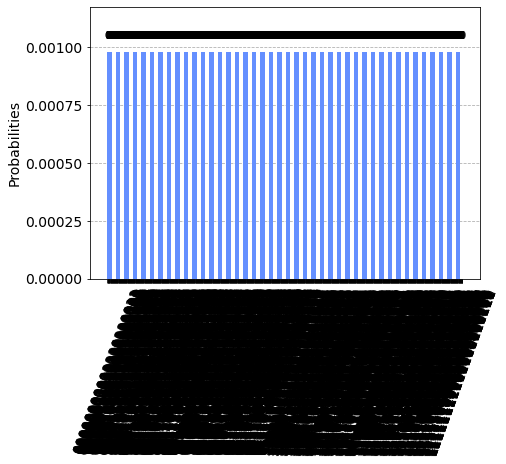

In [ ]:
i=0

#print(type(np.meshgrid(gammas, betas)[0]))


#print(np.meshgrid(gammas, betas)[0].flatten().tolist())

#for (g, b) in zip(gammas, betas):
#    print(g)
#    print(b)
#    i=i+1
#    print(i)
          
#print(np.meshgrid(gammas, betas)[1])

# run on local simulator
backend = Aer.get_backend("qasm_simulator")
shots = 1024

#TQAOA = transpile(QAOA, backend)
#qobj = assemble(TQAOA, shots=shots)
#QAOA_results = backend.run(qobj).result()

#plot_histogram(QAOA_results.get_counts(),figsize = (8,6),bar_labels = False)
tl, bl = np.meshgrid(gammas, betas)
tl = tl.flatten().tolist()
bl = bl.flatten().tolist()
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: b,theta: t} for (t,b) in zip(tl,bl)])
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: 0.0,theta: t} for t in gammas])

print(circuit)

circuits = [ qc.bind_parameters({theta: t, beta: b}) for (t,b) in zip(tl, bl) ]
job = execute(circuits, backend=backend, shots=1024)

result = job.result()
counts = result.get_counts()
print(len(counts))
#print(counts)

plot_histogram(counts[0])

In [ ]:
# Evaluate the data from the simulator


#hist        = {}
means = []



for count in counts:
    avr_C       = 0
    max_C       = [0,0]
    tmp_eng = 0.0
    
    for sample in list(count.keys()):
        #print(sample)
        # use sampled bit string x to compute C(x)
        x         = [2*int(num)-1 for num in list(sample)]
        #print(x)
        #print(count[sample]/shots)
        tmp_eng   = cost_function_C(x,E,V)

        # compute the expectation value and energy distribution
        avr_C     = avr_C    + count[sample]*tmp_eng
        #hist[str(round(tmp_eng))] = hist.get(str(round(tmp_eng)),0) + counts[sample]
        #print(hist)
        #plot_histogram(hist)

        # save best bit string
        if( max_C[1] < tmp_eng):
            max_C[0] = sample
            max_C[1] = tmp_eng

    M1_sampled   = avr_C/shots
    means = means + [M1_sampled]
    #print(M1_sampled)
    
print('Max means: ', max(means))
print('The approximate solution is x* = %s with C(x*) = %d \n' % (max_C[0],max_C[1]))

#Max = 342

Max means:  24.3720703125
The approximate solution is x* = 00001100100000100010 with C(x*) = 331 



In [ ]:
cost_function_C([-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1], E, V)

4405.0

In [ ]:
print('Circuit depth: ', qc.depth())

Circuit depth:  41
